In [38]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array


In [39]:
img_path='/content/peacock.jpg'
img=load_img(img_path)


In [40]:
img_array=img_to_array(img)

In [41]:
img_array=img_array.reshape((1,)+img_array.shape)

In [42]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [43]:
augmented_image = datagen.flow(img_array, batch_size=1)

In [44]:
def visualize_augumented_images(generator,num_images):
  fig,axes = plt.subplots(1,num_images,figsize=(20,20))
  for i in range(num_images):
    batch=next(generator)
    augmented_image =batch[0]
    axes[i].imshow(augmented_image)
    axes[i].axis('off')
  plt.show()

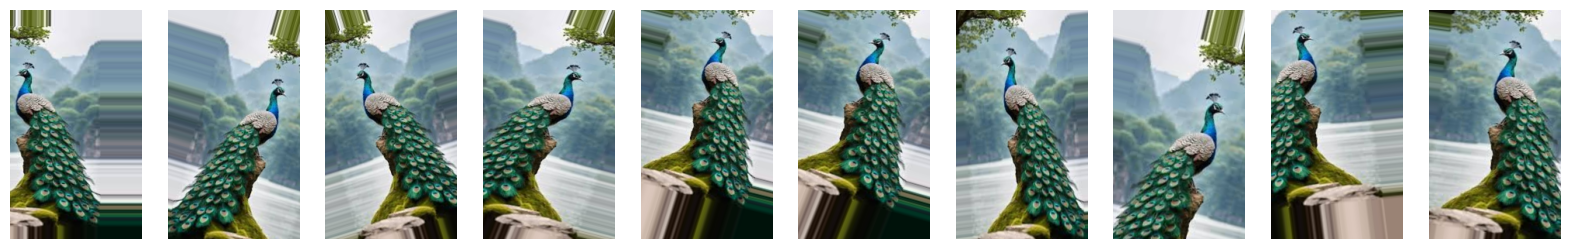

In [50]:
visualize_augumented_images(augmented_image,10)

In [62]:
def original_augumented(generator,num_pairs=3):
  fig,axes =plt.subplots(num_pairs,2,figsize=(10,5*num_pairs))
  original = img_array[0]

  for i in range(num_pairs):
    batch = next(generator)
    augumented_image = batch[0]

    axes[i,0].show(original)
    axes[i,0].set_title('Original')
    axes[i,0].axis('off')

    axes[i,1].show(augumented_image)
    axes[i,1].set_title('Augumented')
    axes[i,1].axis('off')
  plt.tight_layout()
  plt.show()

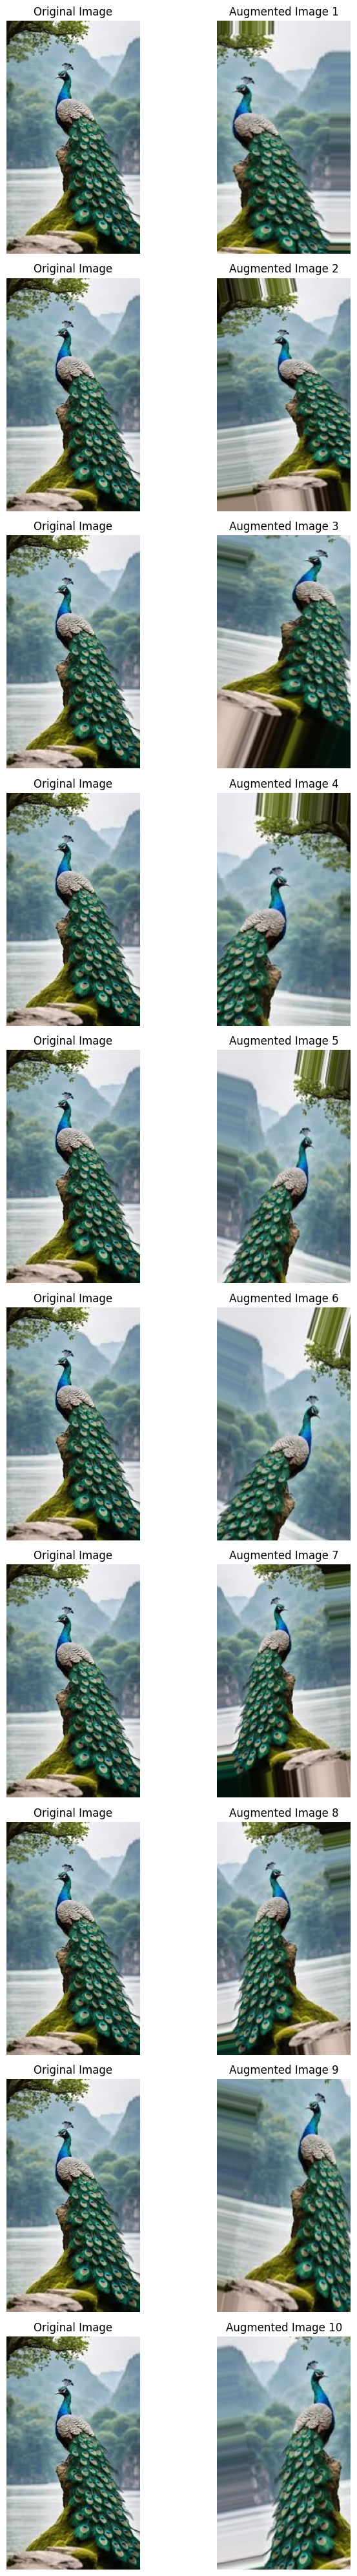

In [65]:
def visualize_original_and_augmented(original_img, generator, num_images):
    fig, axes = plt.subplots(num_images, 2, figsize=(8, 4 * num_images))


    original_rescaled = np.array(original_img) / 255.0

    for i in range(num_images):
        aug_batch = next(generator)
        aug_image = aug_batch[0]


        axes[i, 0].imshow(original_rescaled)
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis('off')


        axes[i, 1].imshow(aug_image)
        axes[i, 1].set_title(f"Augmented Image {i+1}")
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

visualize_original_and_augmented(img, augmented_images, 10)